In [40]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Storing the csvpaths
csvpath_confirmed="time_series_19-covid-Confirmed.csv"
csvpath_deaths="time_series_19-covid-Deaths.csv"
csvpath_recovered="time_series_19-covid-Recovered.csv"

In [3]:
#Reading into a pandas DataFrame
Confirmed_df1=pd.read_csv(csvpath_confirmed)
Deaths_df1=pd.read_csv(csvpath_deaths)
Recovered_df1=pd.read_csv(csvpath_recovered)

In [4]:
#Manipulating the Confirmed dataframe
#Dropping the colums which are not required
Confirmed_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [5]:
#Filling NaN with a 0 for calculations
Confirmed_df1=Confirmed_df1.fillna(0)
Confirmed_df1.head(20)
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,43,47,48,50,50,50,53,59,70,75
1,Japan,2,1,2,2,4,4,7,7,11,...,331,360,420,461,502,511,581,639,639,701
2,Singapore,0,1,3,3,4,5,7,7,10,...,110,117,130,138,150,150,160,178,178,200
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,50,50,83,93,99,117,129,149,149,197
5,Canada,0,0,0,0,0,0,1,1,1,...,12,13,21,21,27,32,32,39,46,64
6,Australia,0,0,0,0,3,4,4,4,4,...,22,22,26,28,38,48,55,65,65,92
7,Australia,0,0,0,0,1,1,1,1,2,...,10,10,10,11,11,15,18,21,21,36
8,Australia,0,0,0,0,0,0,0,1,3,...,11,13,13,13,15,15,18,20,20,35
9,Cambodia,0,0,0,0,0,1,1,1,1,...,1,1,1,1,2,2,2,3,3,5


In [6]:
#Grouping the Confirmed cases dataframe by Country/Region
Confirmed_group=Confirmed_df1.groupby(["Country/Region"])


#Creating the final Confirmed dataframe to be used further
Confirmed_final=Confirmed_group.sum()
Confirmed_final.head(20)
#len(Confirmed_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,5,7,7,7
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33
Algeria,0,0,0,0,0,0,0,0,0,0,...,12,12,17,17,19,20,20,20,24,26
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,1,1,2,8,12,12,17,19,19,31
Armenia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,4,8
Aruba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Australia,0,0,0,0,4,5,5,6,9,9,...,52,55,60,63,76,91,107,128,128,200


In [7]:
#Manipulating the Deaths dataframe
#Dropping the colums which are not required
Deaths_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [8]:
#Filling NaN with a 0 for calculations
Deaths_df1=Deaths_df1.fillna(0)
Deaths_df1.head(20)
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Japan,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,10,10,15,16,19
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Canada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
6,Australia,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
7,Australia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Australia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cambodia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Grouping the Death cases dataframe by Country/Region
Deaths_group=Deaths_df1.groupby(["Country/Region"])


#Creating the final Death dataframe to be used further
Deaths_final=Deaths_group.sum()
Deaths_final.head(20)
#len(Deaths_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,2
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aruba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3


In [10]:
#Manipulating the Recovered dataframe
#Dropping the colums which are not required
Recovered_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)

In [11]:
#Filling NaN with a 0 for calculations
Recovered_df1=Recovered_df1.fillna(0)
Recovered_df1.head(20)
#len(Recovered_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,2,2,5,5,5,...,31,31,31,31,31,31,33,34,34,35
1,Japan,0,0,0,0,1,1,1,1,1,...,43,43,46,76,76,76,101,118,118,118
2,Singapore,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97
3,Nepal,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,0,0,0,0,0,0,...,22,22,22,23,24,24,24,26,26,26
5,Canada,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4
6,Australia,0,0,0,0,0,0,0,0,2,...,4,4,4,4,4,4,4,4,4,4
7,Australia,0,0,0,0,0,0,0,0,0,...,4,7,7,7,7,7,7,7,7,8
8,Australia,0,0,0,0,0,0,0,0,0,...,1,8,8,8,8,8,8,8,8,8
9,Cambodia,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [12]:
#Grouping the Recovered cases dataframe by Country/Region
Recovered_group=Recovered_df1.groupby(["Country/Region"])


#Creating the final Recovered dataframe to be used further
Recovered_final=Recovered_group.sum()
Recovered_final.head(20)
#len(Recovered_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aruba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,2,2,...,11,21,21,21,21,21,21,21,21,23


In [13]:
Confirmed_final.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
1/27/20    int64
1/28/20    int64
1/29/20    int64
1/30/20    int64
1/31/20    int64
2/1/20     int64
2/2/20     int64
2/3/20     int64
2/4/20     int64
2/5/20     int64
2/6/20     int64
2/7/20     int64
2/8/20     int64
2/9/20     int64
2/10/20    int64
2/11/20    int64
2/12/20    int64
2/13/20    int64
2/14/20    int64
2/15/20    int64
2/16/20    int64
2/17/20    int64
2/18/20    int64
2/19/20    int64
2/20/20    int64
2/21/20    int64
2/22/20    int64
2/23/20    int64
2/24/20    int64
2/25/20    int64
2/26/20    int64
2/27/20    int64
2/28/20    int64
2/29/20    int64
3/1/20     int64
3/2/20     int64
3/3/20     int64
3/4/20     int64
3/5/20     int64
3/6/20     int64
3/7/20     int64
3/8/20     int64
3/9/20     int64
3/10/20    int64
3/11/20    int64
3/12/20    int64
3/13/20    int64
dtype: object

In [14]:
#Creating a dataframe for Singapore
Singapore_df=pd.DataFrame({"Dates":Confirmed_final.loc["Singapore",:].index.tolist(),\
                           "#Cummulative Confirmed Cases":Confirmed_final.loc["Singapore",:].tolist(),\
                           "#Cummulative Death Cases":Deaths_final.loc["Singapore",:].tolist(),
                           "#Cummulative Recovered Cases":Recovered_final.loc["Singapore",:].tolist()})

In [15]:
Singapore_df

,Dates,#Cummulative Confirmed Cases,#Cummulative Death Cases,#Cummulative Recovered Cases
0,1/22/20,0,0,0
1,1/23/20,1,0,0
2,1/24/20,3,0,0
3,1/25/20,3,0,0
4,1/26/20,4,0,0
5,1/27/20,5,0,0
6,1/28/20,7,0,0
7,1/29/20,7,0,0
8,1/30/20,10,0,0
9,1/31/20,13,0,0


In [16]:
confirmed_total_singapore=Singapore_df.loc[len(Singapore_df)-1,"#Cummulative Confirmed Cases"]
confirmed_total_singapore

200

In [17]:
death_total_singapore=Singapore_df.loc[len(Singapore_df)-1,"#Cummulative Death Cases"]
death_total_singapore

0

In [18]:
recovered_total_singapore=Singapore_df.loc[len(Singapore_df)-1,"#Cummulative Recovered Cases"]
recovered_total_singapore

97

In [19]:
total_days_singapore = len(Singapore_df)
total_days_singapore

52

In [26]:
total_population_singapore=5836884

In [29]:
#% of Death=Total Death/Total confirmed *100
#% of Recovered=Total Recovered/Total confirmed *100
#Infection rate=Total confirmed/Total population *100
#Speed of Infection=Total Confirmed/Total days


#percentage_death_singapore
percentage_death_singapore = round((death_total_singapore/confirmed_total_singapore)*100,2)

#percentage_recovered_singapore
percentage_recovered_singapore = round((recovered_total_singapore/confirmed_total_singapore)*100,2)

#infection_rate_singapore
infection_rate_singapore = round((confirmed_total_singapore/total_population_singapore)*100,5)


speed_infection_singapore = round((confirmed_total_singapore/total_days_singapore),1)
speed_infection_singapore

3.8

In [30]:
#Confirmed_df1["Country/Region"].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

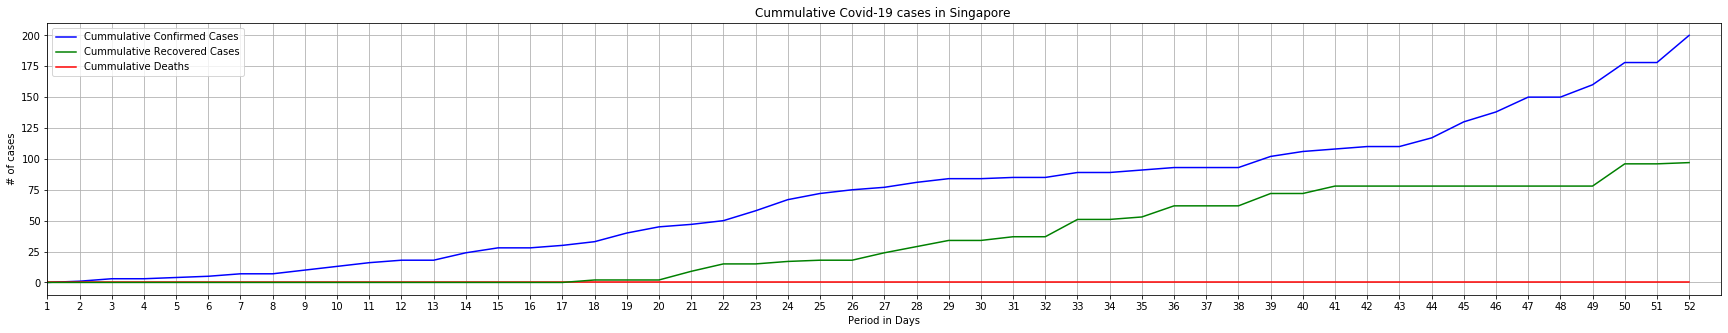

Everyday 3.8 people got infected in from 22nd Jan 2020 to 13th March 2020.
The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was 0.00343.
0.0% population suffered death from 22nd Jan 2020 to 13th March 2020.
48.5% population recovered from 22nd Jan 2020 to 13th March 2020.


In [86]:
#Graphical analysis of Covid-19 cases in Singapore 
plt.figure(figsize=(30,5))
x_axis_singapore = np.arange(1, len(Singapore_df)+1)
tick_locations_singapore = []
for x in x_axis_singapore:
    tick_locations_singapore.append(int(x))
    
plt.title("Cummulative Covid-19 cases in Singapore ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.xlim(1,53)
plt.grid()
    
confirmed_cases_singapore, = plt.plot(x_axis_singapore, Singapore_df.loc[:,'#Cummulative Confirmed Cases'], color="blue", label="Cummulative Confirmed Cases")
death_cases_singapore, = plt.plot(x_axis_singapore, Singapore_df.loc[:,'#Cummulative Death Cases'], color="red", label="Cummulative Deaths")
recovered_cases_singapore, = plt.plot(x_axis_singapore, Singapore_df.loc[:,'#Cummulative Recovered Cases'], color="green", label="Cummulative Recovered Cases")

plt.legend(handles=[confirmed_cases_singapore, recovered_cases_singapore, death_cases_singapore], loc="upper left")
plt.xticks(tick_locations_singapore)
plt.show()

print(f"Everyday {speed_infection_singapore} people got infected in from 22nd Jan 2020 to 13th March 2020.")
print(f"The rate at which the population got infected from 22nd Jan 2020 to 13th March 2020 was {infection_rate_singapore}.")
print(f"{percentage_death_singapore}% population suffered death from 22nd Jan 2020 to 13th March 2020.")
print(f"{percentage_recovered_singapore}% population recovered from 22nd Jan 2020 to 13th March 2020.")

In [75]:
#tick_locations_singapore

In [80]:
#Creating a dataframe with respect to the data on each day
cs_df=pd.DataFrame({"Days":tick_locations_singapore,"CC_Singapore":Singapore_df['#Cummulative Confirmed Cases'],\
                    "DC_Singapore":Singapore_df['#Cummulative Death Cases'],\
                    "RC_Singapore":Singapore_df["#Cummulative Recovered Cases"]})

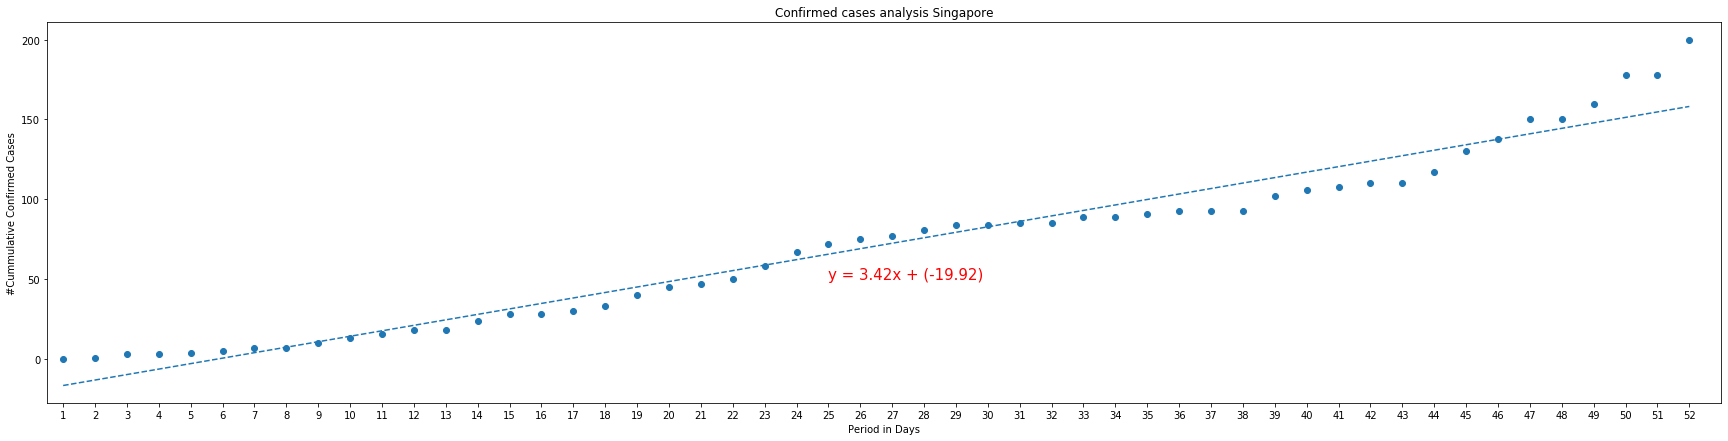

In [90]:
#Plotting a Linear Regression with respect to number of confirmed cases 
plt.figure(figsize=(30,7))
cs_slope, cs_int, cs_r, cs_p, cs_std_err = stats.linregress(cs_df["Days"], \
                                                            cs_df["CC_Singapore"])
cs_fit = cs_df["Days"]* cs_slope + cs_int
plt.scatter(cs_df["Days"],cs_df["CC_Singapore"])
plt.plot(cs_df["Days"],cs_fit,"--")
line_eq = "y = " + str(round(cs_slope,2)) + "x + (" + str(round(cs_int,2))+")"
plt.annotate(line_eq,(25,50),fontsize=15,color="r")
plt.xticks(tick_locations_singapore)
plt.xlabel('Period in Days')
plt.ylabel('#Cummulative Confirmed Cases')
plt.xlim(0.5,53)

plt.title("Confirmed cases analysis Singapore")
plt.show()

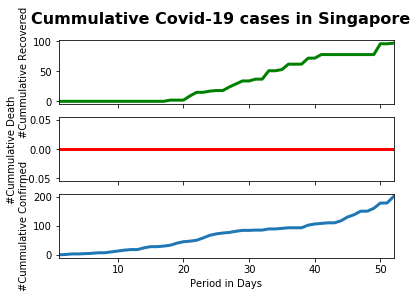

In [79]:

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Cummulative Covid-19 cases in Singapore", fontsize=16, fontweight="bold")

ax3.set_xlim(min(tick_locations_singapore), max(tick_locations_singapore))
ax3.plot(tick_locations_singapore, Singapore_df.loc[:,'#Cummulative Confirmed Cases'], linewidth=3 )
#ax1.plot(year, vc_fit, "b--", linewidth=1)
ax3.set_ylabel("#Cummulative Confirmed")

ax2.plot(tick_locations_singapore,Singapore_df.loc[:,'#Cummulative Death Cases'], linewidth=3, color="r")
#ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("#Cummulative Death")

ax1.plot(tick_locations_singapore,Singapore_df.loc[:,'#Cummulative Recovered Cases'], linewidth=3, color="g")
#ax1.plot(year, aa_fit, "g--", linewidth=1)
ax1.set_ylabel("#Cummulative Recovered")
ax3.set_xlabel("Period in Days")

plt.show()